# Test AP twitter analysis library

In [18]:
# This is the library we're building

from snowflake import *
import pandas as pd
import json
import time
import math
import os
import os.path
import matplotlib.pyplot as plt

def get_timestamp(snowflake_id):
    timestamp, data_center, worker, sequence = melt(int(snowflake_id))
    # print('the tweet was created at {}'.format(local_datetime(timestamp)))
    return timestamp

def plot_datetimes(df, plottitle=''):
    xx = df['ymdh'].astype(str).value_counts().sort_index().reset_index()

    # Never have more than 20 labels. 
    spacing = math.ceil(len(xx)/20)
    labels = ['']*len(xx)
    for i in range(math.ceil(len(xx)/spacing)):
        labels[spacing*i] = xx['index'][spacing*i]

    plt.figure(figsize=(10,4))
    plot = plt.bar(xx['index'], xx['ymdh'], tick_label=labels)
    plt.xticks(rotation=270)
    plt.title(plottitle)
    return

def plot_hours(df, plottitle=''):
    plt.figure(figsize=(8,2))
    gps = df.groupby(['hour'])['text'].count().reset_index()
    plt.bar(gps['hour'], gps['text'])
    plt.title(plottitle)
    return


class Aptwitterlook:
    ''' Companion class to Aptwitterpull. This one analyses the results from that one... 
    '''

    def __init__(self, data_dir='', subdirs=[]):
        ''' datadir might contain subdirectories, one for each search 
        in this group
        '''
        
        self.tweets = pd.DataFrame([])
        self.data_dirs = []
        
        # Suck data in from the directory/ies listed
        if os.path.isfile('{}/tweets.json'.format(data_dir)):
            self.data_dirs = [data_dir]
        else:
            if len(subdirs)>0:
                # Only get data from the listed directories
                self.data_dirs = ['{}/{}'.format(data_dir,s) for s in subdirs]
            else:
                # grab it all, we don't care!
                self.data_dirs = [x for x in os.listdir('.') if os.path.isdir(x)]
        
        self.read_tweets(self.data_dirs)


    # Helper functions for reading json, csv and formatted txt files
    def read_json(self, filename):
        with open(filename, "r", encoding="utf-8") as f:
              return json.loads(f.read())

    def read_csv(self, filename):
        return pd.read_csv(filename)

    def read_text(self, filename):
        with open(filename, "r", encoding="utf-8") as handle:
              return handle.read()


    def read_tweets(self, datadirs):
        ''' Get tweet data and grab basic timing data out of it'''
        
        for datadir in datadirs:
            tweetjson = self.read_json('{}/tweets.json'.format(datadir))
            print('{} has {} tweets'.format(datadir, len(tweetjson)))
            dftweets = pd.DataFrame(tweetjson, index=[0]).transpose().reset_index()
            dftweets.rename(index=str, columns={'index': 'tweet_url', 0: 'text'}, inplace=True)
            dftweets['datadir'] = datadir
            dftweets['user'] = dftweets['tweet_url'].str.split('/').str[3]
            dftweets['tweet_id'] = dftweets['tweet_url'].str.split('/').str[5]
            dftweets['timestamp'] = dftweets['tweet_id'].apply(get_timestamp)
            dftweets['datetime'] = pd.to_datetime(dftweets['timestamp'],unit='ms')
            dftweets['date'] = dftweets['datetime'].dt.date
            dftweets['hour'] = dftweets['datetime'].dt.hour
            dftweets['ymdh'] = dftweets['datetime'].dt.year*1000000 + dftweets['datetime'].dt.month*10000 + dftweets['datetime'].dt.day*100 +dftweets['datetime'].dt.hour
            self.tweets = self.tweets.append(dftweets)
            plot_datetimes(dftweets)
        
        return

    
    def hunt_bots(self):
        
        usercounts = self.tweets['user'].value_counts().reset_index()
        print('potential bots: \n{}'.format(usercounts[usercounts['user'] >= 72]))

        plot_hours(self.tweets, 'all tweets')
        for user in usercounts[usercounts['user'] >= 72]['index'].to_list():
            plot_hours(self.tweets[self.tweets['user'] == user], user)
        return usercounts

    
    def hunt_text(self, dftweets):
        return
    
    
    def analyse_targets(self, target_list):
        return


data/kamalaharrisdestroyed has 1367 tweets
data/kamaladestroyed has 328 tweets
potential bots: 
Empty DataFrame
Columns: [index, user]
Index: []


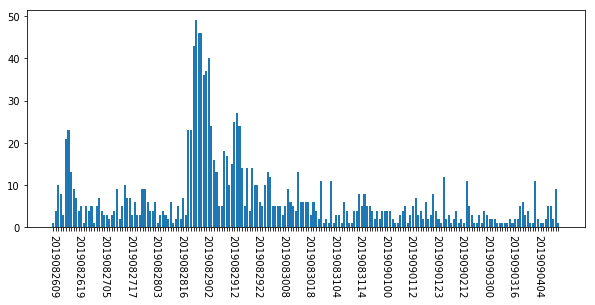

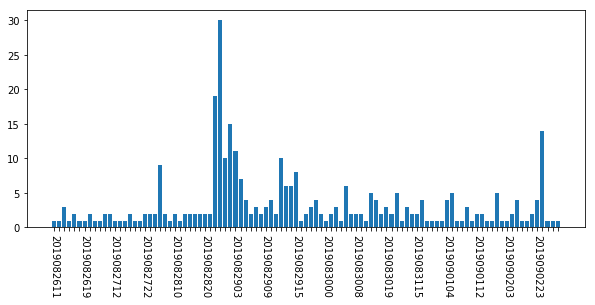

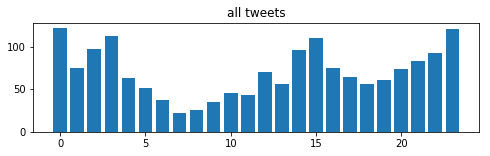

In [20]:
# Call library

#datadir = input('Data directory name> ')
datadir = 'data'
tp = Aptwitterlook(datadir, ['kamalaharrisdestroyed', 'kamaladestroyed'])
#tp.analyse_targets(target_list)
#df = tp.read_tweets('{}/{}'.format(datadir, 'kamalaharrisdestroyed'))
users=tp.hunt_bots()

In [63]:
df

,tweet_url,text,user,tweet_id,timestamp,datetime,date,hour,ymdh
0,https://twitter.com/FirePuff12/status/11693098...,@Horge94414064 @krystalball Tulsi didn’t reall...,FirePuff12,1169309833838727168,1567620163770,2019-09-04 18:02:43.770,2019-09-04,18,2019090418
1,https://twitter.com/AslanEgia/status/116930877...,RT @FirePuff12: @JC7U @mtracey #DNCfearsTulsi ...,AslanEgia,1169308772851998720,1567619910811,2019-09-04 17:58:30.811,2019-09-04,17,2019090417
2,https://twitter.com/GeorgeSoniak/status/116930...,#iwrotethedamnbill #BernieSanders #Bernie2020 ...,GeorgeSoniak,1169307389130092544,1567619580906,2019-09-04 17:53:00.906,2019-09-04,17,2019090417
3,https://twitter.com/ValiantProgress/status/116...,@adhysopell @KamalaHarris You call it attacked...,ValiantProgress,1169305357371551744,1567619096497,2019-09-04 17:44:56.497,2019-09-04,17,2019090417
4,https://twitter.com/FirePuff12/status/11693038...,@JC7U @mtracey #DNCfearsTulsi #KamalaHarrisDes...,FirePuff12,1169303835241676801,1567618733593,2019-09-04 17:38:53.593,2019-09-04,17,2019090417
5,https://twitter.com/kamart160/status/116930339...,RT @MetcalfeMegan: I love that they're acting ...,kamart160,1169303391245361157,1567618627736,2019-09-04 17:37:07.736,2019-09-04,17,2019090417
6,https://twitter.com/jackiemccaffrey/status/116...,RT @MetcalfeMegan: @f_thumb #KamalaHarrisDestr...,jackiemccaffrey,1169299481319415810,1567617695537,2019-09-04 17:21:35.537,2019-09-04,17,2019090417
7,https://twitter.com/MetcalfeMegan/status/11692...,@f_thumb #KamalaHarrisDestroyed by #TulsiTheDe...,MetcalfeMegan,1169298710808821760,1567617511833,2019-09-04 17:18:31.833,2019-09-04,17,2019090417
8,https://twitter.com/MetcalfeMegan/status/11692...,I love that they're acting like they're still ...,MetcalfeMegan,1169298369702813698,1567617430507,2019-09-04 17:17:10.507,2019-09-04,17,2019090417
9,https://twitter.com/Anthony93516773/status/116...,RT @FirePuff12: @TulsiGabbard They won’t even ...,Anthony93516773,1169297527407030272,1567617229688,2019-09-04 17:13:49.688,2019-09-04,17,2019090417


In [64]:
df['text'].value_counts()

RT @noreallyhowcome: The best part of this is the AUDIENCE reaction. #TulsiDidntQualifyParty but she also didn’t keep innocent people in ja…                                                                                                                                                                              223
RT @Ventuckyspaz: "And I am proud of that work."\n\nLet's review why the DNC is keeping Tulsi out of the next debate despite getting over 27…                                                                                                                                                                             124
RT @TheRealPamIAm: Funny how #KamalaHarris thinks she’s going to be President! 🤨\n\nShe’s bottomed out in the polls at a measly 5%... WAY LOW…                                                                                                                                                                             35
RT @Mattison: Tulsi is 2020’s Jill Stein. A fr

In [65]:
df['date'].unique()

array([datetime.date(2019, 9, 4), datetime.date(2019, 9, 3),
       datetime.date(2019, 9, 2), datetime.date(2019, 9, 1),
       datetime.date(2019, 8, 31), datetime.date(2019, 8, 30),
       datetime.date(2019, 8, 29), datetime.date(2019, 8, 28),
       datetime.date(2019, 8, 27), datetime.date(2019, 8, 26)],
      dtype=object)

In [66]:
df['user'].value_counts()

GeorgeSoniak       60
Hal4               29
NODJATAR           29
FuckBarrel_PAC     23
SEAAdams2          18
drink_oat_milk     16
FirePuff12         16
RobbinMilne        15
AslanEgia          12
GGodLove77         10
TruthTalkerUSA     10
jaysukai            8
LibertyPoet         8
antiwarmisfit       8
MetcalfeMegan       8
leucinedreams       7
jackiemccaffrey     7
_NPOB1              7
noreallyhowcome     6
chipmcdonald        6
GeoPolitical10      6
FatesPeak           6
Paris84860386       6
ANapolitano9        6
CarlaSi55518776     6
Jmconger65          5
ValiantProgress     5
Global_Netizen1     5
Malagraves          5
C_Rich75            4
                   ..
CestlavieQ          1
JEMueller2100       1
JLZimmerman05       1
ItsMeMario904       1
NomNomNomXO         1
trumpredpill        1
bronxilla           1
ruthellaowens       1
TheCharlieKruse     1
saminthecan         1
laughingliberal     1
DittyTimbob         1
Crabtreedave        1
AnOlsen9            1
MAPires195

In [69]:
df[df['text'].str.startswith('RT @noreallyhowcome:')]

,tweet_url,text,user,tweet_id,timestamp,datetime,date,hour,ymdh
21,https://twitter.com/FirePuff12/status/11692501...,RT @noreallyhowcome: The best part of this is ...,FirePuff12,1169250131398385664,1567605929599,2019-09-04 14:05:29.599,2019-09-04,14,2019090414
88,https://twitter.com/Jmxnxy/status/116860330271...,RT @noreallyhowcome: The best part of this is ...,Jmxnxy,1168603302713413633,1567451713623,2019-09-02 19:15:13.623,2019-09-02,19,2019090219
115,https://twitter.com/jarathkaru/status/11684245...,RT @noreallyhowcome: The best part of this is ...,jarathkaru,1168424583336087554,1567409103603,2019-09-02 07:25:03.603,2019-09-02,7,2019090207
162,https://twitter.com/Gibbs_Terrance/status/1168...,RT @noreallyhowcome: The best part of this is ...,Gibbs_Terrance,1168222410216267776,1567360901775,2019-09-01 18:01:41.775,2019-09-01,18,2019090118
208,https://twitter.com/AshleyTurtleXO/status/1167...,RT @noreallyhowcome: The best part of this is ...,AshleyTurtleXO,1167970220020916224,1567300774947,2019-09-01 01:19:34.947,2019-09-01,1,2019090101
224,https://twitter.com/aofarre/status/11679157041...,RT @noreallyhowcome: The best part of this is ...,aofarre,1167915704126857218,1567287777345,2019-08-31 21:42:57.345,2019-08-31,21,2019083121
272,https://twitter.com/RonnyRedpill/status/116774...,RT @noreallyhowcome: The best part of this is ...,RonnyRedpill,1167744309728296961,1567246913736,2019-08-31 10:21:53.736,2019-08-31,10,2019083110
277,https://twitter.com/OfficialChadRob/status/116...,RT @noreallyhowcome: The best part of this is ...,OfficialChadRob,1167716192041230336,1567240209957,2019-08-31 08:30:09.957,2019-08-31,8,2019083108
318,https://twitter.com/Omu_Jam/status/11675671749...,RT @noreallyhowcome: The best part of this is ...,Omu_Jam,1167567174942318592,1567204681512,2019-08-30 22:38:01.512,2019-08-30,22,2019083022
324,https://twitter.com/Erikamt082015/status/11675...,RT @noreallyhowcome: The best part of this is ...,Erikamt082015,1167539759184400384,1567198145086,2019-08-30 20:49:05.086,2019-08-30,20,2019083020
